<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/DroneAsnmnt_Outlier-LR_130Recrd_workingv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1258]:
with open("./sample_data/Drone_Data_clnd130.csv", 'r',encoding = "utf-8") as file:
    for i in range(0,4):
        print(file.readline())

﻿Model,L,W,H,P,V,S

AAI Shadow 200,3400,4200,1050,1,2,48.61

AAI Shadow 400,3841,5150,112,1,2,51.39

AAI Shadow 600,4800,6830,1120,1,2,55.56



In [1259]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

print("If there are no errors, modules are load!")

If there are no errors, modules are load!


In [1260]:
import pandas as pd

# Here we upload the data from csv files using pandas
# the comma separates the coulms and we see the countries in each line.
dataFrame = pd.read_csv("./sample_data/Drone_Data_clnd130.csv", delimiter=',', encoding='utf-8') 

#dataFrame=dataFrame.dropna()
dataFrame = dataFrame.loc[:, ~dataFrame.columns.str.contains('^Unnamed')]
#dataFrame['UAV_Model'] = dataFrame.to_numeric(dataFrame['UAV_Model'])
#Check values of the column
#dataFrame.Class.unique()
#dataFrame.Class = dataFrame.Class.map( {'Plane':0 , 'Flying_wing':1, 'Hexacopter':2, 'Quadcopter':3} )
#dataFrame.Class.unique()
#print(drdata.head())

In [1261]:
#Rename Columns
#dataFrame=dataFrame.rename(columns={"UAV_Model":"M","Class":"C","Propellers": "P", "V_Stabilizer_and_Winglets": "V", "Max speed, m/s": "S"})

In [1262]:
# Now we want to separate those from the dataset
from sklearn import preprocessing

df_l_w_h = dataFrame[["L","W", "H", "P", "S"]]
#df_l_w_h = dataFrame[["C","W", "H", "P", "S"]]
#print(drdata_l_w_h.head())



In [1263]:
#df_l_w_h.isnull()
#Print Count of null values for each coloumn 
print(df_l_w_h.isnull().sum())

L     0
W     0
H    14
P     0
S     0
dtype: int64


In [1264]:

# drop all rows with any NaN and NaT values
df_l_w_h = df_l_w_h.dropna()
print(df_l_w_h.isnull().sum())

L    0
W    0
H    0
P    0
S    0
dtype: int64


In [1265]:
# Now we need to order the data according to the growing score
df_sorted = df_l_w_h.sort_values(by=["S"],ascending=True)
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

df_sorted.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
#Tell you rows and columns in oyur data
df_sorted.shape


(122, 5)

In [1266]:
#correlation between paramters
print(df_sorted.corr())

          L         W         H         P         S
L  1.000000  0.793645  0.841842  0.375655  0.551967
W  0.793645  1.000000  0.808515  0.509158  0.355438
H  0.841842  0.808515  1.000000  0.337046  0.548735
P  0.375655  0.509158  0.337046  1.000000  0.143290
S  0.551967  0.355438  0.548735  0.143290  1.000000


In [1267]:
#d = preprocessing.normalize(df_sorted)
d = df_sorted
#df_normalized = pd.DataFrame(d, columns=["L", "W","H"])
df_normalized=df_sorted
#df_normalized.head()

In [1268]:
#print(df_normalized.head(38))

In [1269]:
#print(df_normalized.describe())

In [1270]:
import seaborn as sns
#Outlier for specific column
def outlierPlot(df, columnName):
  sns.boxplot(df[columnName])
  plt.title(columnName)
  plt.show()
'''
for column in df_normalized:
    outlierPlot(df_normalized,column)
'''

'\nfor column in df_normalized:\n    outlierPlot(df_normalized,column)\n'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


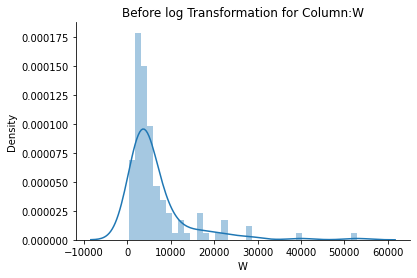

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


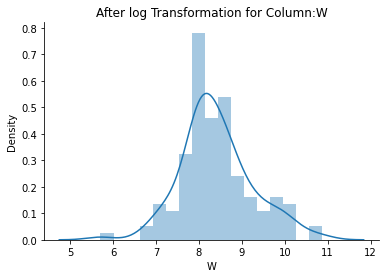

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


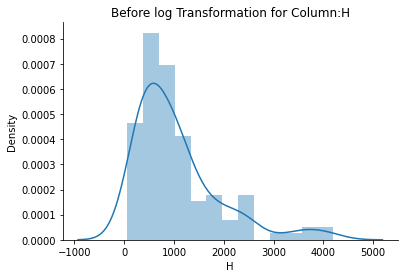

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


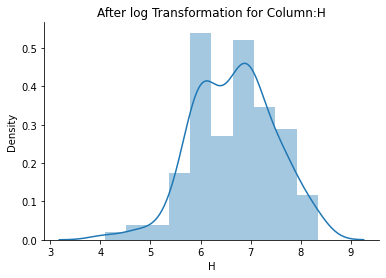

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


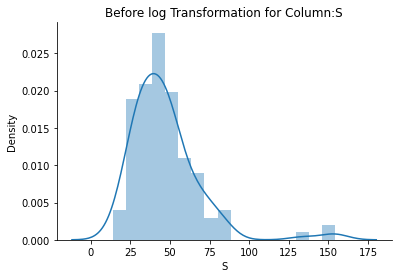

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


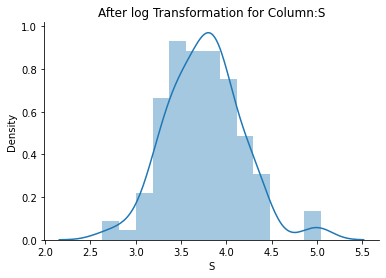

In [1271]:
def colLogTransformation(df, colName):
  col_to_transform=df_normalized[colName]
  sns.distplot(col_to_transform)
  plt.title("Before log Transformation for Column:"+ colName)
  sns.despine()
  plt.show()
  col_to_transform=np.log(col_to_transform)
  sns.distplot(col_to_transform)
  plt.title("After log Transformation for Column:"+colName)
  sns.despine()
  plt.show()
  df_normalized[colName]=col_to_transform

colLogTransformation(df_normalized,"W")
colLogTransformation(df_normalized,"H")
colLogTransformation(df_normalized,"S")
#for column in df_normalized:
#    colLogTransformation(df_normalized,column)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


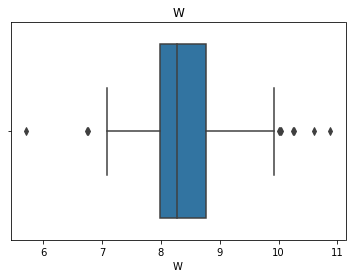

No. of rows Before 122


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


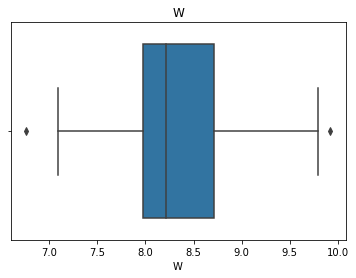

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


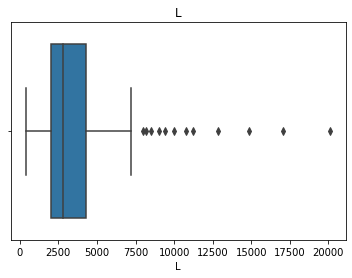

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


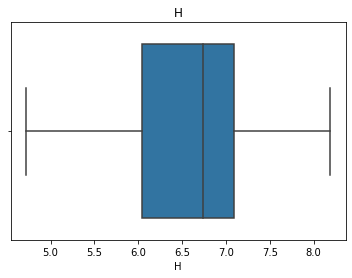

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


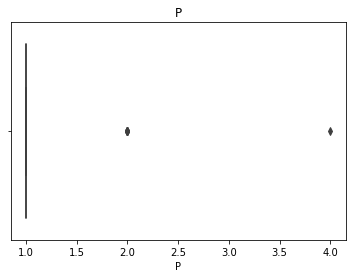

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


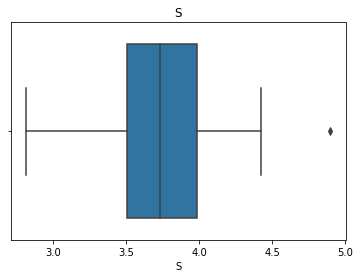

No. of rows After 113


In [1272]:
#Remove Outliers..run only once
def drop_outliers(df, colName):
  iqr=1.5*(np.percentile(df[colName],75) - np.percentile(df[colName],25))
  df.drop(df[df[colName] > (iqr+np.percentile(df[colName],75))].index, inplace=True)
  df.drop(df[df[colName] < (np.percentile(df[colName],25)-iqr)].index, inplace=True)

outlierPlot(df_normalized,'W')
print("No. of rows Before", df_normalized.shape[0])
drop_outliers(df_normalized,'H')
drop_outliers(df_normalized,'W')

outlierPlot(df_normalized,'W')
outlierPlot(df_normalized,'L')
outlierPlot(df_normalized,'H')
outlierPlot(df_normalized,'P')
outlierPlot(df_normalized,'S')
print("No. of rows After", df_normalized.shape[0])

In [1273]:
#Multiple linear Regressor
#https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/


#df_normalized.hist(bins=50, figsize=(20,15))
#save_fig('histograms')
'''
plt.figure()
plt.plot(df_normalized['L'],'.', label='L')
plt.plot(df_normalized['W'],'.', label='W')
plt.plot(df_normalized['H'],'.', label='H')
plt.plot(df_normalized['H'],'.', label='S')
plt.legend()
plt.show()
'''

"\nplt.figure()\nplt.plot(df_normalized['L'],'.', label='L')\nplt.plot(df_normalized['W'],'.', label='W')\nplt.plot(df_normalized['H'],'.', label='H')\nplt.plot(df_normalized['H'],'.', label='S')\nplt.legend()\nplt.show()\n"

In [1274]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
'''
d= df_normalized.drop(columns = 'H')
d=preprocessing.normalize(d)
X=pd.DataFrame(d, columns=["L", "W"])
'''
X= df_normalized.drop(columns = ['L','P','S'])
y=df_normalized['S']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#test_set.head()

In [1275]:
y.head(11)

89     2.813611
124    2.893700
26     3.036394
34     3.100993
79     3.100993
55     3.161670
126    3.161670
132    3.218876
117    3.218876
67     3.218876
78     3.241029
Name: S, dtype: float64

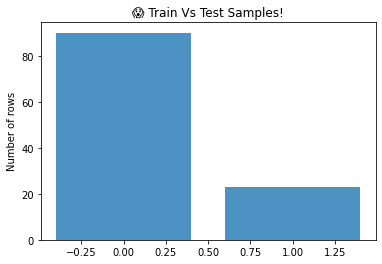

In [1276]:

d_names = (X_train, y_test)
y_pos = range(len(d_names))
plt.bar(
    y_pos, 
    (X_train.shape[0], y_test.shape[0]), 
    align='center', 
    alpha=0.8
)

plt.ylabel('Number of rows') 
plt.title('😱 Train Vs Test Samples!')
plt.show()


In [1277]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled = X_train
#X_test_scaled = X_test
#df_prepared = full_pipeline.fit_transform(df_lw)
#label_prepared = full_pipeline.transform(df_h_label) 
#df_prepared
X_test_scaled

array([[-0.18110206,  0.14305508],
       [-0.50121264, -1.08251633],
       [ 1.02237356,  1.54702519],
       [-0.08517307, -0.82728382],
       [-1.89980895, -1.55354486],
       [ 0.67895921,  0.64236544],
       [ 1.25014507,  1.20997731],
       [-0.44134742, -0.89558532],
       [ 0.15122397,  0.64236544],
       [-0.19769317, -0.7621603 ],
       [-0.40270315,  0.23963841],
       [ 0.37891121,  0.15962217],
       [ 0.49447526,  0.84812627],
       [ 1.33649221,  1.20997731],
       [-0.44624748, -0.89558532],
       [-1.13544187, -1.86592421],
       [-0.9677007 , -0.7943434 ],
       [-0.60652111, -0.11217744],
       [ 2.10085929,  0.95474479],
       [-0.35573429, -0.52830077],
       [ 1.61478189,  0.95474479],
       [-1.04562965, -0.11217744],
       [-1.46070041, -1.29831235]])

In [1278]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#reg = LogisticRegression(random_state=42)
#reg = RandomForestRegressor(n_estimators=7, random_state=42)
#reg = SVR(kernel="linear")
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)


LinearRegression()

In [1279]:
reg.predict(X_train_scaled)


array([3.88349466, 3.80442944, 4.3125431 , 4.20876738, 3.68788622,
       3.92683852, 3.88725468, 4.10870632, 3.32674483, 3.89334017,
       4.28082889, 3.46910221, 3.73282618, 3.93206934, 3.6199344 ,
       3.75657842, 3.65936811, 3.46910221, 3.72730455, 3.85252276,
       3.65153083, 3.6313371 , 3.60186997, 4.03515766, 3.33739414,
       3.82010154, 3.64354273, 3.62298321, 3.79092349, 3.66697128,
       3.65124708, 3.64948385, 3.87518062, 3.84158069, 3.59920876,
       3.360052  , 3.83516618, 3.79345936, 3.58270448, 3.77578946,
       3.33473293, 3.55171024, 3.53364432, 3.91640451, 4.05301907,
       3.63982603, 3.75726129, 3.93923786, 3.73870728, 4.17766844,
       3.87128765, 4.17134672, 3.58989786, 3.71129419, 3.58987859,
       3.89063719, 4.03869658, 3.64354273, 3.72356503, 3.81348942,
       3.75663122, 3.50583051, 3.29058175, 3.87514855, 4.0762521 ,
       3.88059211, 3.49091335, 3.96041882, 3.78428996, 3.62755383,
       3.63059641, 3.18032475, 3.6346128 , 3.67260723, 3.39283

In [1280]:
reg.score(X_train_scaled,y_train)

0.4580661196100221

In [1281]:
reg.score(X_test_scaled,y_test)

0.35000026164891396

In [1282]:
#value wise prediction
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
# Part of the dataset (not used for training) is used to build for the prediction
some_data_prepared = scaler.transform(some_data)

print("Predictions:", reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [3.88349466 3.80442944 4.3125431  4.20876738 3.68788622]
Labels: [3.506457892319648, 3.8548175316573667, 4.422808628394115, 4.378520495344594, 3.4196919642983197]


In [1283]:
test_data = X_test
test_labels = y_test
test_data_prepared = scaler.transform(test_data)
test_data_predictions=reg.predict(test_data_prepared)
print("Predictions:", test_data_predictions)
print("Labels:", list(test_labels))
#reg.score(test_data_prepared,test_labels)

Predictions: [3.73525224 3.60475679 4.05235318 3.70191522 3.29909875 3.93456997
 4.07972322 3.6268721  3.82886123 3.68290372 3.69609494 3.84832373
 3.90876038 4.09701911 3.62589059 3.43528833 3.5269233  3.63621504
 4.23630368 3.66391258 4.13893927 3.54825879 3.40087804]
Labels: [3.9394436010041383, 3.100992784211484, 3.660737148167656, 3.883829271057364, 3.241028629509334, 3.7297814454343623, 3.912023005428146, 3.8548175316573667, 3.7297814454343623, 3.3243163373261977, 4.199755076629969, 3.5473158897921495, 3.966132331075178, 4.422808628394115, 3.3243163373261977, 2.813610696762703, 3.912023005428146, 3.506457892319648, 3.9394436010041383, 3.7297814454343623, 4.240463070352095, 4.017463517886143, 3.3243163373261977]


In [1284]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print ('==================TEST-Start=====================================') 
print("Count of Values equals in Prediction Column=",(test_data_predictions == 0).sum())
mse = mean_squared_error(test_labels, test_data_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_labels, test_data_predictions)
mape = mean_absolute_percentage_error(test_labels, test_data_predictions)

print ('MSE:',mse ,'RMSE:', rmse, 'and MAE:', mae, 'and MAPE:', mae) 
print ('==================TEST-End=====================================') 

==================TEST-Start=====================================
Count of Values equals in Prediction Column= 0
MSE: 0.09438207340582554 RMSE: 0.30721665548245514 and MAE: 0.2623310556170373 and MAPE: 0.2623310556170373
==================TEST-End=====================================


In [1285]:
y_train

109    3.506458
45     3.854818
74     4.422809
70     4.378520
110    3.419692
         ...   
114    4.343026
66     3.324316
68     4.066117
42     3.729781
59     4.240463
Name: S, Length: 90, dtype: float64

In [1286]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
df_predictions = reg.predict(X_train_scaled)
print("Count of Values equals in Prediction Column=",(df_predictions == 0).sum())
mse = mean_squared_error(y_train, df_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, df_predictions)
mape = mean_absolute_percentage_error(y_train, df_predictions)
#print('My name is', os.getlogin(), 'and I am', 42)
print ('MSE:',mse ,'RMSE:', rmse, 'and MAE:', mae, 'and MAPE:', mae) 

Count of Values equals in Prediction Column= 0
MSE: 0.07152835456007792 RMSE: 0.2674478539081552 and MAE: 0.2195669901763442 and MAPE: 0.2195669901763442


In [1287]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
from sklearn.model_selection import cross_val_score
# cross_val_score is a way to use the cross-validation in sklearn.
# cross validation https://scikit-learn.org/stable/modules/cross_validation.html
cross_validation_scores = cross_val_score(reg, X_train_scaled, y_train,
                                          scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-cross_validation_scores)
display_scores(rmse_scores)

Scores: [0.27014778 0.24475755 0.20483959 0.20774254 0.23355304 0.29063501
 0.34757865 0.30404746 0.23789547 0.40087482]
Mean: 0.2742071912957824
Standard deviation: 0.05972675361134117
